In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(n):
    return 2*n*np.log(n)

In [3]:
df_mostly = pd.read_csv("random_mostly.csv")

dataList_mostly = df_mostly.to_numpy()
x_mostly = dataList_mostly[: , 0]
x_mostly = x_mostly.astype('int')

y_mostly = dataList_mostly[: , 1]
y_mostly = y_mostly.astype('int')

In [4]:
df_partial = pd.read_csv("random_partial.csv")

dataList_partial = df_partial.to_numpy()
x_partial = dataList_partial[: 20, 0]
x_partial = x_partial.astype('int')

y_partial = dataList_partial[: 20, 1]
y_partial = y_partial.astype('int')

In [5]:
df_random = pd.read_csv("random_random.csv")

dataList_random = df_random.to_numpy()
x_random = dataList_random[: , 0]
x_random = x_random.astype('int')

y_random = dataList_random[: , 1]
y_random = y_random.astype('int')

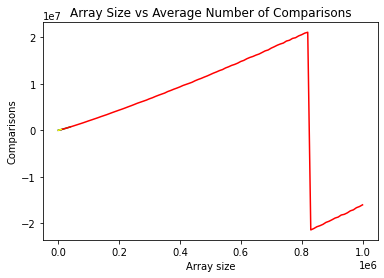

In [6]:
plt.title('Array Size vs Average Number of Comparisons')
plt.plot(x_mostly, y_mostly, 'k', color='blue')
plt.plot(x_partial, y_partial, 'k', color = 'green')
plt.plot(x_random, y_random, 'k', color = 'red')
plt.plot(x_mostly, f(x_mostly), 'k', color = 'yellow')
plt.xlabel('Array size')
plt.ylabel('Average Number of Comparisons')
plt.show()